In [30]:
# reference: https://github.com/stefan-jansen/machine-learning-for-trading/blob/main/07_linear_models/01_linear_regression_intro.ipynb

### Multiple Regression

$y = \beta_{0} + \beta_{1} X_{1} + \beta_{2} X_{2} + \epsilon$

In [31]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

In [32]:
! pip show matplotlib | grep Version | awk '{print $2}'

3.10.6


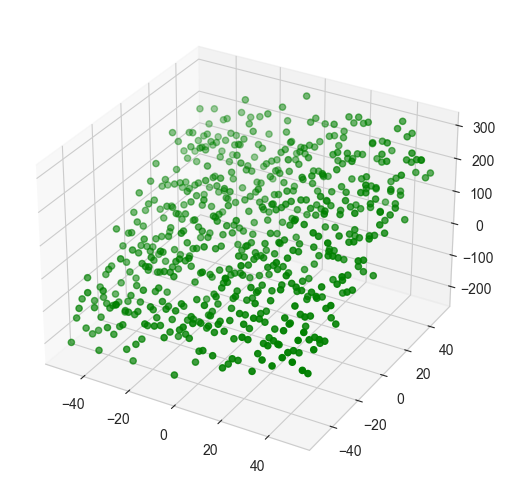

In [33]:
## Create data
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

## Plot
# This writing style has been deprecated since version 3.4
# three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')  
fig = plt.figure(figsize=(15, 5))
three_dee = fig.add_subplot(111, projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
sns.despine()
plt.tight_layout()

In [34]:
X = data[['X_1', 'X_2']]
y = data['Y']
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1103.
Date:                Wed, 17 Sep 2025   Prob (F-statistic):          2.74e-205
Time:                        18:16:55   Log-Likelihood:                -3339.4
No. Observations:                 625   AIC:                             6685.
Df Residuals:                     622   BIC:                             6698.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.9968      2.029     24.144      0.0

In [35]:
# β̂ = (XᵀX)⁻¹Xᵀy
# Calculate by hand using the OLS formula
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)

const   49.00
X_1      0.98
X_2      3.02
dtype: float64

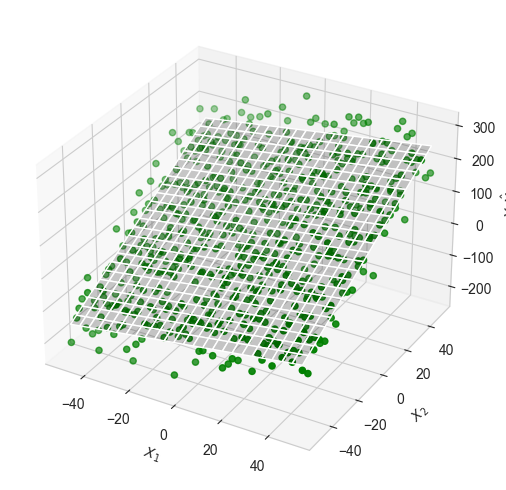

In [36]:
# This writing style has been deprecated since version 3.4
# three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')  
fig = plt.figure(figsize=(15, 5))
three_dee = fig.add_subplot(111, projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = model.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
# for _, row in data.iterrows():
#     plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
sns.despine()
plt.tight_layout()
# we can see it's a plane.

### More parameters

In [ ]:
# We can not draw it on the graph, if there are more than 3 parameters.

import numpy as np
import pandas as pd
import statsmodels.api as sm

# --------------------------------------------------
# 1. Simulate a 4-parameter linear model (X1, X2, X3, X4)
#    Y = β0 + β1*X1 + β2*X2 + β3*X3 + β4*X4 + ε
# --------------------------------------------------
n = 10000                                 # sample size
np.random.seed(42)

# design matrix (4 explanatory variables)
X = pd.DataFrame({
    'X_1': np.random.normal(0, 10, n),
    'X_2': np.random.normal(5, 3, n),
    'X_3': np.random.normal(-2, 7, n),
    'X_4': np.random.uniform(-50, 50, n)
})

# true coefficients
true_beta = np.array([50, 1.0, -2.0, 3.0, -4.0])   # [β0, β1, β2, β3, β4]

# add intercept term and generate response
X_ols = sm.add_constant(X)            # adds β0 column
y = X_ols @ true_beta + np.random.normal(0, 25, n)

# --------------------------------------------------
# 2. Fit OLS with statsmodels
# --------------------------------------------------
model = sm.OLS(y, X_ols).fit()

# --------------------------------------------------
# 3. Display results
# --------------------------------------------------
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                 5.675e+04
Date:                Wed, 17 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:16:56   Log-Likelihood:                -46325.
No. Observations:               10000   AIC:                         9.266e+04
Df Residuals:                    9995   BIC:                         9.270e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.3440      0.494    101.993      0.0

In [38]:
# --------------------------------------------------
# 4. Manual β estimate (X'X)^-1 X'y
# --------------------------------------------------
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)

const   50.34
X_1      1.02
X_2     -2.05
X_3      2.95
X_4     -4.00
dtype: float64